In [9]:
!pip install matplotlib
!pip install seaborn
!pip install xgboost




You should consider upgrading via the '/home/nina/Schreibtisch/HCI/Projekt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/nina/Schreibtisch/HCI/Projekt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/nina/Schreibtisch/HCI/Projekt/venv/bin/python -m pip install --upgrade pip' command.


Sample type: 

Zuordnung:

{'First Recurrence': np.int64(0), 'Tumor Primary': np.int64(1), 'n Recurrence': np.int64(2)}


/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.503597   0.478327  0.503597  0.446676
2                  SVM  0.503597   0.478327  0.503597  0.446676
3    Gradient Boosting  0.517986   0.523713  0.517986  0.446607
4              XGBoost  0.517986   0.523713  0.517986  0.446607
6        Decision Tree  0.517986   0.523713  0.517986  0.446607
5                  KNN  0.460432   0.478106  0.460432  0.354454
1  Logistic Regression  0.273381   0.301269  0.273381  0.228485
7          Naive Bayes  0.172662   0.289762  0.172662  0.098339


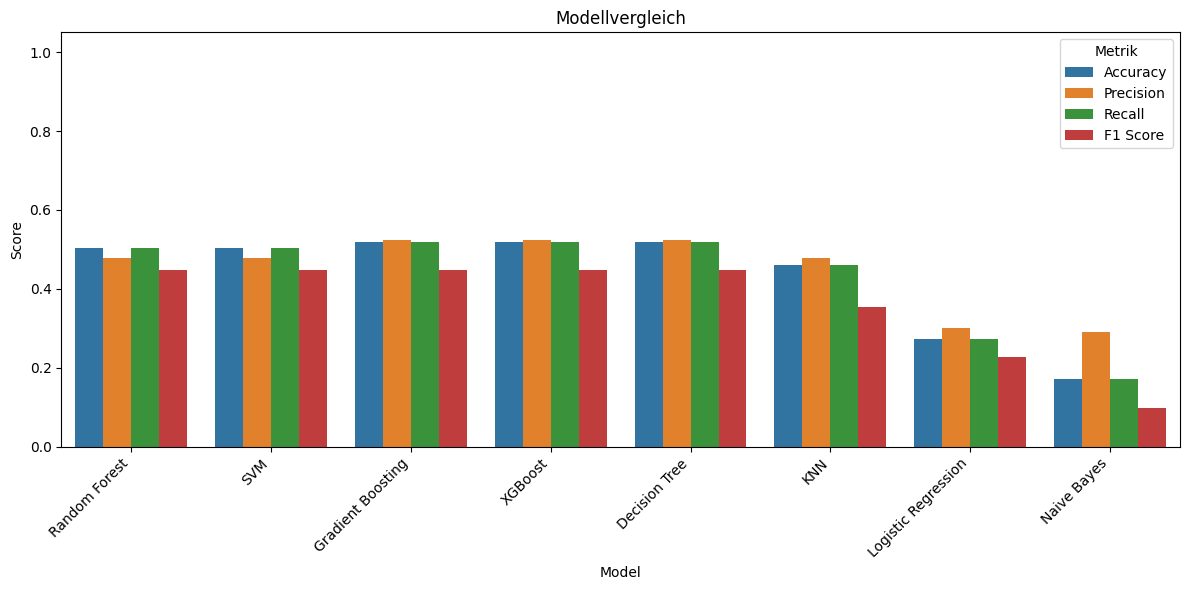

Random Forest Ergebnisse
Accuracy: 0.273

Confusion Matrix:
 [[ 0 10 50]
 [ 0 20 40]
 [ 0  1 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.65      0.33      0.44        60
           2       0.17      0.95      0.28        19

    accuracy                           0.27       139
   macro avg       0.27      0.43      0.24       139
weighted avg       0.30      0.27      0.23       139



/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

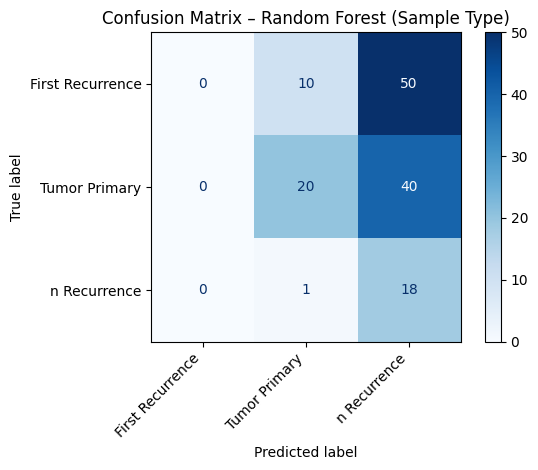

Logistic Regression Ergebnisse
Accuracy: 0.273

Confusion Matrix:
 [[ 0 10 50]
 [ 0 20 40]
 [ 0  1 18]]

Classification Report:
                   precision    recall  f1-score   support

First Recurrence       0.00      0.00      0.00        60
   Tumor Primary       0.65      0.33      0.44        60
    n Recurrence       0.17      0.95      0.28        19

        accuracy                           0.27       139
       macro avg       0.27      0.43      0.24       139
    weighted avg       0.30      0.27      0.23       139



/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nina/Schreibtisch/HCI/Projekt/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

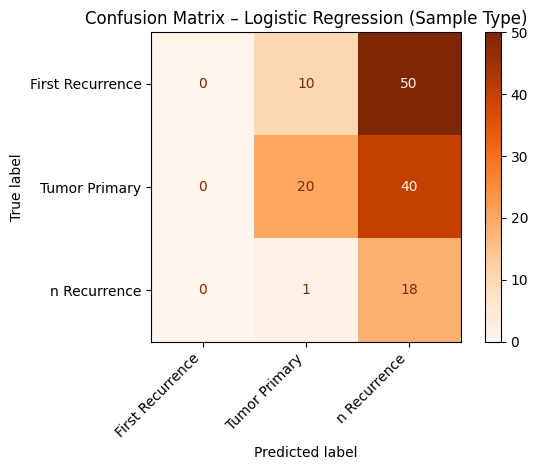

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

clinical_data = pd.read_csv("hcai_data-main/difg_glass_clinical_data_reduced.tsv.txt", sep="\t")

#print("Part 1:")
#print(clinical_data.shape)
#print(clinical_data.columns[:10])  #ersten 10 Spalten


##### auf sample type klassifizieren
print("Sample type: \n")
#print(clinical_data["Sample Type"])
clinical_data = clinical_data.dropna(subset=["Sample Type"]) #leere werte dropen
#survival columns dropen
clinical_data= clinical_data.drop("Overall Survival", axis='columns')
clinical_data= clinical_data.drop("Overall Survival (months)", axis='columns')
#print(clinical_data)
#labels: First Metastasis, Tumor Primary, First Recurrence, Second Recurrence, Third Recurrence, Fourth recurrence

#### drei klassen ###
def simplify_sample_type(sample):
    sample = sample.strip().lower()
    if "second recurrence" in sample or "third recurrence" in sample or "fourth recurrence" in sample:
        return "n Recurrence"
    elif "first recurrence" in sample:
        return "First Recurrence"
    elif "tumor primary" in sample:
        return "Tumor Primary"
    elif "first metastasis" in sample:
        return "REMOVE"
    else:
        return np.nan

clinical_data["Sample Type Simplified"] = clinical_data["Sample Type"].apply(simplify_sample_type)
clinical_data = clinical_data[clinical_data["Sample Type Simplified"].notna()]
clinical_data = clinical_data[clinical_data["Sample Type Simplified"] != "REMOVE"]


cols = ["Sample Type Simplified", "Cancer Type Detailed"]
df = clinical_data[cols].copy()



df_encoded = pd.get_dummies(df,
    columns=[
              "Cancer Type Detailed"],
    drop_first=True
)

#label encoder verwenden, damit z.B. 0 = First Recurrence

encoder = LabelEncoder()
y = encoder.fit_transform(df_encoded["Sample Type Simplified"])
print("Zuordnung:\n")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

X = df_encoded.drop(columns=["Sample Type Simplified"])#features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

########################## modelle ########################
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

plt.figure(figsize=(12,6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.title("Modellvergleich")
plt.ylim(0,1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Metrik")
plt.show()

######################################################################



# train - random forest
model = RandomForestClassifier(class_weight="balanced",random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Random Forest Ergebnisse")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=encoder.classes_, cmap='Blues')
labels = unique_labels(y_test, y_pred)
class_names = encoder.inverse_transform(labels)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_names,
    cmap='Blues'
)
plt.title("Confusion Matrix – Random Forest (Sample Type)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


log_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Ergebnisse")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_log, target_names=encoder.classes_))


#ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, display_labels=encoder.classes_, cmap='Oranges')
labels_log = unique_labels(y_test, y_pred_log)
class_names_log = encoder.inverse_transform(labels_log)

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_log,
                            labels=labels_log,
                            target_names=class_names_log))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log,
    display_labels=class_names_log,
    cmap='Oranges'
)
plt.title("Confusion Matrix – Logistic Regression (Sample Type)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
#######################################################################################################################################################

#K-Means

#######################################################################################################################################################

kmeans = KMeans(n_clusters=5, random_state=42)  #5 sample types: Tumor Primary, First Recurrence, Second Recurrence, Third Recurrence, Fourth recurrence
clusters = kmeans.fit_predict(X)

X["Cluster"] = clusters

# labels nicht encoded
df_analysis = df_encoded.copy()
df_analysis["Cluster"] = clusters
df_analysis["Sample Type"] = df["Sample Type"].values

#-----comparison Cluster vs. Sample Type------#
#crosstab computes a simple cross tabulation of two (or more) factors
crosstab = pd.crosstab(df_analysis["Cluster"], df_analysis["Sample Type"], normalize='index')
print("Cluster vs. Sample Type\n")
print("Rounded crosstab value", crosstab.round(2))
crosstab.plot(kind='bar', stacked=False, colormap='plasma', figsize=(10,6))
plt.title("K-Means Clusters vs. Sample Type")
plt.ylabel("Percentage of Sample Type within Cluster")
plt.xlabel("Cluster")
plt.legend(title="Sample Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#number of each Sample Types per cluster 
raw_crosstab = pd.crosstab(df_analysis["Cluster"], df_analysis["Sample Type"])
print("Number of samples per cluster\n")
print(raw_crosstab)

#######################################################################################################################################################

#K-Means outcome: it's finding some patterns

#######################################################################################################################################################

NameError: name 'KMeans' is not defined